In [1]:
import numpy as np
from numpy import linalg as la
from numpy import random as rnd
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
a0 = 0.333
a1 = 0.5
be = 0.5
b0 = 0.5
b1 = 0.5
b2 = 0.1
b3 = 0.1
f  = 0.5
g0 = 0.167
g1 = 0.133
g2 = 0.125
g3 = 0.075
p1 = 0.033
p2 = 0.042
u  = 0.05
N  = 1e7

In [3]:
par = [a0,a1,be,b0,b1,b2,b3,f,g0,g1,g2,g3,p1,p2,u,N]

In [4]:
def SEIR_step(state,par):
    
    [S,E0,E1,I0,I1,I2,I3,R,D]=state
    [a0,a1,be,b0,b1,b2,b3,f,g0,g1,g2,g3,p1,p2,u,N]=par
    
    p_SE0  = 1. - np.exp(-(be*E1+b0*I0+b1*I1+b2*I2+b3*I3)/N) #suscetivel -> Exposto
    p_E0E1 = 1. - np.exp(-a0)
    p_E1I  = 1. - np.exp(-a1)
    p_II0  = f
    p_I0R  = 1. - np.exp(-g0)
    p_I1R  = 1. - np.exp(-g1)
    p_I2R  = 1. - np.exp(-g2)
    p_I3R  = 1. - np.exp(-g3)
    p_I1I2 = 1. - np.exp(-p1)
    p_I2I3 = 1. - np.exp(-p2)
    p_I3D  = 1. - np.exp(-u)
    
    n_SE0  = rnd.binomial(S,p_SE0)
    n_E0E1 = rnd.binomial(E0,p_E0E1)
    n_E1I  = rnd.binomial(E1,p_E1I)
    n_E1I0   = rnd.binomial(n_E1I,p_II0)
    n_E1I1   = n_E1I - n_E1I0
    n_I0R  = rnd.binomial(I0,p_I0R)
    n_I1R  = rnd.binomial(I1,p_I1R)
    n_I2R  = rnd.binomial(I2,p_I2R)
    n_I3R  = rnd.binomial(I3,p_I3R)
    n_I1I2 = rnd.binomial(I1,p_I1I2)
    n_I2I3 = rnd.binomial(I2,p_I2I3)
    n_I3D  = rnd.binomial(I3,p_I3D)
    
    S  = S  - n_SE0
    E0 = E0 - n_E0E1 + n_SE0
    E1 = E1 - n_E1I0 - n_E1I1 + n_E0E1
    I0 = I0 - n_I0R  + n_E1I0
    I1 = I1 - n_I1R  - n_I1I2 + n_E1I1
    I2 = I2 - n_I2R  - n_I2I3 + n_I1I2
    I3 = I3 - n_I3R  - n_I3D  + n_I2I3
    R  = R  + n_I0R  + n_I1R  + n_I2R + n_I3R
    D  = D  + n_I3D
    
    state = [S,E0,E1,I0,I1,I2,I3,R,D]
    return(state)

In [5]:
dict_state={'S':[],'E0':[],'E1':[],'I0':[],'I1':[],'I2':[],'I3':[],'R':[],'D':[]}
simul = pd.DataFrame(dict_state) 

In [6]:
dict_state={'S':[],'E0':[],'E1':[],'I0':[],'I1':[],'I2':[],'I3':[],'R':[],'D':[]}
simul = pd.DataFrame(dict_state) 
par = [a0,a1,be,b0,b1,b2,b3,f,g0,g1,g2,g3,p1,p2,u,N]
state=[10000000.0, 0, 0, 100, 50, 20, 10, 0, 0]
for dia in range(0,150):
    state=SEIR_step(state,par)
    simul.loc[len(simul)] = state

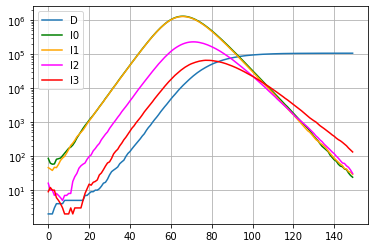

In [7]:
fig, ax = plt.subplots()
# optionally make log scale
ax.set_yscale("log", nonposy='clip')

simul.plot(kind='line',y='D',ax=ax)
simul.plot(kind='line',y='I0', color='green',ax=ax)
simul.plot(kind='line',y='I1', color='orange',ax=ax)
simul.plot(kind='line',y='I2', color='magenta',ax=ax)
simul.plot(kind='line',y='I3', color='red',ax=ax)

plt.grid()
plt.show()


In [8]:
simul

,S,E0,E1,I0,I1,I2,I3,R,D
0,9999926.0,74.0,0.0,86.0,46.0,16.0,9.0,21.0,2.0
1,9999863.0,115.0,22.0,62.0,42.0,10.0,12.0,52.0,2.0
2,9999801.0,137.0,55.0,58.0,38.0,10.0,10.0,69.0,2.0
3,9999728.0,162.0,80.0,59.0,47.0,7.0,10.0,84.0,3.0
4,9999645.0,200.0,89.0,81.0,46.0,8.0,6.0,101.0,4.0
...,...,...,...,...,...,...,...,...,...
145,108378.0,2.0,3.0,42.0,43.0,61.0,227.0,9784841.0,106583.0
146,108378.0,1.0,1.0,40.0,42.0,52.0,202.0,9784867.0,106597.0
147,108378.0,0.0,1.0,32.0,35.0,47.0,173.0,9784905.0,106609.0
148,108378.0,0.0,1.0,27.0,34.0,39.0,152.0,9784932.0,106617.0


In [9]:
pwd

'/home/rodrigo/Dropbox/DOC/hidden_physical_models/SIR_models'

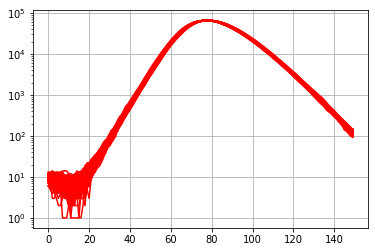

In [10]:
realizations = 100

fig, ax = plt.subplots()

for j in range(realizations):
    
    dict_state={'S':[],'E0':[],'E1':[],'I0':[],'I1':[],'I2':[],'I3':[],'R':[],'D':[]}
    simul = pd.DataFrame(dict_state) 
    par = [a0,a1,be,b0,b1,b2,b3,f,g0,g1,g2,g3,p1,p2,u,N]
    state=[10000000.0, 0, 0, 100, 50, 20, 10, 0, 0]
    for dia in range(0,150):
        state=SEIR_step(state,par)
        simul.loc[len(simul)] = state
        
    ax.set_yscale("log", nonposy='clip')
    
         
    #simul.plot(kind='line',y='D',ax=ax)
    #simul.plot(kind='line',y='I0', color='green',ax=ax)
    #simul.plot(kind='line',y='I1', color='orange',ax=ax)
    #simul.plot(kind='line',y='I2', color='magenta',ax=ax)
    simul.plot(kind='line', y= 'I3', color='red',ax=ax, legend= None)
    
    

    
    
plt.grid()
plt.show()

    

In [23]:
simul

,S,E0,E1,I0,I1,I2,I3,R,D
0,9999908.0,92.0,0.0,87.0,40.0,20.0,10.0,23.0,0.0
1,9999842.0,137.0,21.0,74.0,33.0,18.0,9.0,46.0,0.0
2,9999769.0,169.0,53.0,65.0,33.0,17.0,8.0,65.0,1.0
3,9999695.0,192.0,85.0,63.0,34.0,15.0,8.0,86.0,2.0
4,9999593.0,236.0,109.0,70.0,44.0,11.0,8.0,107.0,2.0
...,...,...,...,...,...,...,...,...,...
145,108106.0,3.0,4.0,41.0,40.0,49.0,192.0,9784363.0,107382.0
146,108105.0,2.0,5.0,35.0,33.0,41.0,172.0,9784392.0,107395.0
147,108105.0,0.0,3.0,33.0,27.0,40.0,157.0,9784413.0,107402.0
148,108104.0,1.0,3.0,29.0,24.0,34.0,133.0,9784436.0,107416.0


In [ ]:

dict_state={'S':[],'E0':[],'E1':[],'I0':[],'I1':[],'I2':[],'I3':[],'R':[],'D':[]}
simul = pd.DataFrame(dict_state) 
par = [a0,a1,be,b0,b1,b2,b3,f,g0,g1,g2,g3,p1,p2,u,N]
state=[10000000.0, 0, 0, 100, 50, 20, 10, 0, 0]
for dia in range(0,150):
    state=SEIR_step(state,par)
    simul.loc[len(simul)] = state